# HW06 (제출기한-5월10일 금요일 18시)
Datascience 모듈 연습을 위한 문제입니다. 
- 반드시 수업시간 배운 내용만을 사용하여 코드를 작성합니다. 
- 한 셀에 여러줄의 코드를 사용해도 무방합니다.
- <font color=red> 반드시 출력셀의 결과가 예시와 동일하게 출력되도록 코드를 작성하시오. (불필요한 출력을 하는 코드를 작성하지 마시오) </font>

제출시 다음 사항에 유의하기 바랍니다.
- 텍스트 셀에 설명되어 있는 각 문항을 잘 읽은 뒤,
- 코드 셀에 적절한 코드를 작성하기 바랍니다.
- 작성 후 파일명에 ``학번``을 명시후 지정한 공유폴더에 업로드합니다.
- 이때, 공유를 반드시 profkwon@cicweb.ulsan.ac.kr 에게만 합니다.


In [0]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### 수업시간에 사용하였던 다음 NBA 연봉 데이터를 이용합니다.

In [44]:
nba = Table.read_table('nba_salaries.csv').relabeled("2015-2016 SALARY", 'SALARY')
nba

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


### 문제1
각 TEAM별 선수 수를 감소순으로 정렬하여 Table로 출력하시오. 

In [45]:
nba.group('TEAM').sort('count', descending=True).show()

TEAM,count
Memphis Grizzlies,21
Charlotte Hornets,18
Washington Wizards,17
Utah Jazz,17
Toronto Raptors,17
Phoenix Suns,17
Oklahoma City Thunder,16
New Orleans Pelicans,16
Boston Celtics,15
Portland Trail Blazers,14


### 문제2
연봉이 가장 높은 200명 중 POSITION별 평균 연봉을 Table변수``top200``에 저장하시오. 

In [0]:
top200 = nba.select('POSITION', 'SALARY').sort('SALARY',descending=True).take(np.arange(200))
top200 = top200.group('POSITION', np.mean)

In [47]:
top200

POSITION,SALARY mean
C,9.07777
PF,8.1689
PG,9.12843
SF,10.2884
SG,8.10591


### 문제3
위와 같은 식으로 연봉이 가장 높은 100명 중 POSITION별 평균 연봉을 Table변수 top100에 저장하시오.  

In [0]:
top100 = nba.select('POSITION', 'SALARY').sort('SALARY',descending=True).take(np.arange(100))
top100 = top100.group('POSITION', np.mean)

In [49]:
top100

POSITION,SALARY mean
C,12.8281
PF,12.7646
PG,12.7541
SF,14.9192
SG,11.6078


### 문제4
위에서 구한 두 Table을 합쳐 Table 변수 top을 생성하시오. 이 때, column의 이름을 ``top100``, ``top200``으로 고치되 출력 순서도 ``top100``, ``top200``이 되도록 하시오. 

In [0]:
top = top100.join('POSITION',top200,'POSITION').relabeled('SALARY mean','top100').relabeled('SALARY mean_2','top200')

In [51]:
top

POSITION,top100,top200
C,12.8281,9.07777
PF,12.7646,8.1689
PG,12.7541,9.12843
SF,14.9192,10.2884
SG,11.6078,8.10591


### 문제5
top100과 top200의 POSITION별 상대적 SALARY비중을 비교하기 위하여 top100과 top200 column 각각에 대하여 백분율(소수점 2번째자리에서 round-off)한 결과를 top에 추가하시오. 

In [0]:
ratio100 = top.column('top100')/top.column('top100').sum()*100
ratio100 = ratio100.round(2)
ratio200 = top.column('top200')/top.column('top200').sum()*100
ratio200 = ratio200.round(2)

top = top.with_column('top100 Percent',ratio100,'top200 Percent', ratio200)

In [53]:
top

POSITION,top100,top200,top100 Percent,top200 Percent
C,12.8281,9.07777,19.77,20.28
PF,12.7646,8.1689,19.68,18.25
PG,12.7541,9.12843,19.66,20.39
SF,14.9192,10.2884,23,22.98
SG,11.6078,8.10591,17.89,18.11


### 문제6
``top100 Percent``와 ``top200 Percent``에 대해서 수평 Bar 그래프를 그리시오. 


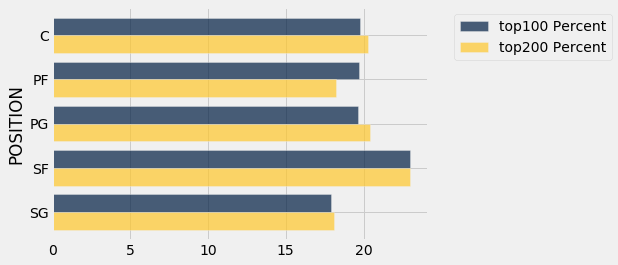

In [54]:
top.select(0,3,4).barh(0)

### 문제7
Table변수 ``nba``의 ``SALARY`` column에 대해서 histogram을 그리시오. (단, bins의 개수를 50으로 설정하시오)


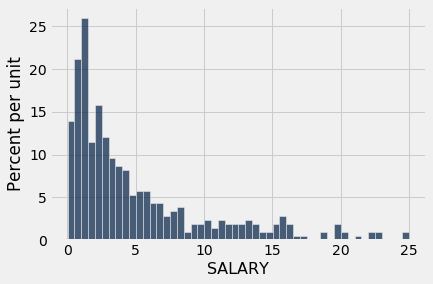

In [55]:
nba.hist('SALARY', bins=50)

### 문제8
Position과 Salary를 입력받으면 nba Table에서  해당 Position의 Salary 중 몇 등에 해당하는지를 계산하는 함수 ``position_ranking``을 작성하시오. (함수 정의는 다음과 같다.)

def position_ranking(nba, p, s):

In [0]:
def position_ranking(nba, p, s):
  rank = 1
  rank += nba.where('POSITION',are.equal_to(p)).sort('SALARY',descending=True).where('SALARY', are.above(s)).num_rows
  return rank

In [57]:
position_ranking(nba, 'C', 15.0)

6

### 보너스문제
위 데이터에 대하여 본인이 출제하고 싶은 문제가 있으면 한 문제를 출제하고 아래에 답안 코드를 작성하시오.

Salary(Max)를 입력받으면 Salary(Max)내의 범위의 Salary와 nba Table내의 Position을 랜덤으로 선정하여 nba Table에서 해당 Position의 Salary 중 몇 등에 해당하는지를 계산하는 함수 randomized_position_ranking을 작성하시오.

In [0]:
def randomized_position_ranking(nba, s_max):
  p = np.random.choice(nba.column('POSITION'))
  s = np.random.choice(range(s_max))
  rank = 1
  rank += nba.where('POSITION',are.equal_to(p)).sort('SALARY',descending=True).where('SALARY', are.above(s)).num_rows
  return rank

In [59]:
randomized_position_ranking(nba, 15)

11